## FIGURE 2 - DESCRIBING THE DYNAMICS IN A SINGLE SIMULATION 

Using a simulation where z changes and showing how the manipulated compartment differs from the other compartments over time. 

### IMPORTS

In [7]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


In [10]:
#######################################################
#### GUI 

edt_filename = widgets.Text(description = 'File name', value='Exp3-5_v2')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename, btn_select,output_file)



#######################################################
#### FUNCTIONS



def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    file_name = "\\"
    file_name = file_name + edt_filename.value 
    
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            
            master_arr = []
            t_arr =[]
            
            
            
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
               
                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])
                    
                    data_arr_2.append(data_arr)
            
                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         
                
                master_arr.append(data_arr_2)
                t_arr_bool = False
                
            
            #df_start['radius'] = 
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []            
            
            ##### LOADING ELECTRODIFFUSION DATA
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                
                E_group = E.get(E_group_arr[x])
                
                ED_data_arr =[] #stores the electrodiffusion data for a group
                
                for y in range(len(list(E_group.keys()))-1): # Looping through all the datasets of the group
                    
                    dataset = E_group.get(str(interval_arr[y+1]))
                   
                    ED_data_arr_2 = [] #stores the dataset values for one dataset
                    for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                        ED_data_arr_2.append(dataset[z])
                    
                    
                    ED_data_arr.append(ED_data_arr_2) 
                    
            
                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)
            
    


    


            
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value='Exp3-5_v2', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

File found and content loaded into memory


In [11]:
print("total time = " + str(t_arr[-1])+ " number of intervals = " + str(len(t_arr)))
print("z-flux @100s (preflux) - interval = " + str(2500) +" time = " + str(t_arr[2500]))
print("z-flux @150s (intraflux) - interval = " + str(3750) +" time = " + str(t_arr[3750]))
print("@50s - interval = " + str(1250) +" time = " + str(t_arr[1250]))
print("@300s - interval = " + str(7500) +" time = " + str(t_arr[7500]))
#print("end flux @120s - interval = " + str(4001) +" time = " + str(t_arr[4001]))
#print("end flux @150s - interval = " + str(5001) +" time = " + str(t_arr[5001]))

global pre_flux_int, intra_flux_int, post_flux_int, start_int, end_int
pre_flux_int = 2500 # 100s just before the z-flux
intra_flux_int = 3750 # 150s in the middle of the flux
post_flux_int = -1 # 400s = last time point in the simulation
start_int = 1250 # point to  start line graphs 50s
end_int = 7500 # point to end line graphs 300s


total time = 399.9599990822147 number of intervals = 10000
z-flux @100s (preflux) - interval = 2500 time = 99.99999983954092
z-flux @150s (intraflux) - interval = 3750 time = 149.99999971330305
@50s - interval = 1250 time = 49.999999965778784
@300s - interval = 7500 time = 299.99999933458946


# FIGURE 2A - elementary changes to conentration, charge and volume

Button(button_style='info', description='Plot 2A', style=ButtonStyle())

Output()

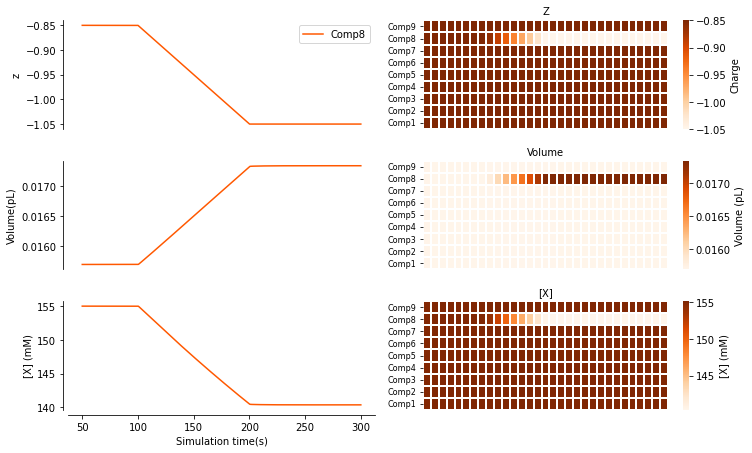

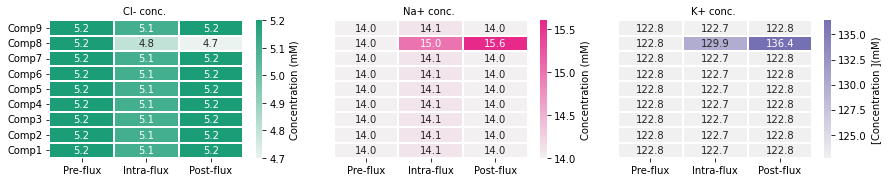

In [16]:
########################################
# GUI
########################################

btn_f2a = widgets.Button(description="Plot 2A", button_style='info')
output_f2a = widgets.Output()

display(btn_f2a, output_f2a)

cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
na_cmap = sns.light_palette('#e7298a', as_cmap=True)
k_cmap = sns.light_palette('#7570b3' , as_cmap=True)

comp_names_arr_r = comp_names_arr[-1::-1]



########################################
# BACKEND
########################################
def btn_f2a_clicked(b):
    
    
    f2a, [(ax_z, ax_heatz),(ax_vol, ax_heatvol), (ax_x,ax_heatx)] = mplt.subplots(3,2, figsize=(10,6),sharex=False)
    f2a.tight_layout()
    


    #t2_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
    z_arr = [master_arr[7][i][8] for i in range(len(t_arr))]
    vol_arr = [master_arr[7][i][3]*1e12 for i in range(len(t_arr))]
    x_arr = [master_arr[7][i][7]*1e3 for i in range(len(t_arr))]

    
    ax_z.plot(t_arr[start_int:end_int], z_arr[start_int:end_int], color = "#FF5800", label="Comp8")
    ax_z.xaxis.set_visible("False")
    ax_z.xaxis.set_ticks([])
    ax_z.set_ylabel("z")
    sns.despine(ax=ax_z,bottom=True,offset=5)
    ax_z.legend()
    #ax_z.set_title("Time vs Impermeant anion charge",fontsize=10)

    
    ax_vol.plot(t_arr[start_int:end_int], vol_arr[start_int:end_int], color = "#FF5800", label="Comp8")
    #ax_vol.set_xlabel("Simulation time(s)")
    ax_vol.xaxis.set_ticks([])
    ax_vol.set_ylabel("Volume(pL)")
    sns.despine(ax=ax_vol,bottom=True,offset=5)
    #ax_vol.set_title("Time vs Volume",fontsize=10)
 
    
    ax_x.plot(t_arr[start_int:end_int], x_arr[start_int:end_int], color = "#FF5800", label="Comp8")
    ax_x.set_xlabel("Simulation time(s)")
    ax_x.set_ylabel("[X] (mM)")
    sns.despine(ax=ax_x,bottom=False,offset=5)
    #ax_x.set_title("Time vs Impermeant anion concentration",fontsize=10)

    conc_arr, z_arr, vol_arr = [],[],[]
    bins = 30
    heat_start_int = 0
    heat_end_int = len(t_arr)
    heat_total_int = heat_end_int - heat_start_int
    bin_int = round(heat_total_int/bins)
    
    for i in range(len(comp_names_arr),0,-1):

        
        temp_arr_conc = [master_arr[i-1][j][7] *1e3 for j in range(len(master_arr[0]))] 
        temp_arr_conc = temp_arr_conc[heat_start_int:heat_end_int:bin_int]
        conc_arr.append(temp_arr_conc)
        
        temp_arr_z = [master_arr[i-1][j][8] for j in range(len(master_arr[0]))] 
        temp_arr_z = temp_arr_z[heat_start_int:heat_end_int:bin_int]
        z_arr.append(temp_arr_z)
        
        temp_arr_vol = [master_arr[i-1][j][3] *1e12 for j in range(len(master_arr[0]))] 
        temp_arr_vol = temp_arr_vol[heat_start_int:heat_end_int:bin_int]
        vol_arr.append(temp_arr_vol)
    
    
    g_conc = sns.heatmap(conc_arr,cmap="Oranges",xticklabels=False, yticklabels=True,  cbar_kws={'pad':0.05,'label':'[X] (mM)', 'orientation':'vertical' }, ax=ax_heatx,linewidth=0.01 )
    ax_heatx.set_title("[X]",fontsize=10)
    g_conc.set_yticklabels(comp_names_arr_r, fontsize=8, rotation=0)
    
    g_z = sns.heatmap(z_arr, cmap="Oranges",xticklabels=False, yticklabels=True, cbar_kws={'pad':0.05,'label':'Charge', 'orientation':'vertical' }, ax=ax_heatz,linewidth=0.01 )
    g_z.set_yticklabels(comp_names_arr_r, fontsize=8, rotation=0)
    ax_heatz.set_title("Z",fontsize=10)
    
    g_vol = sns.heatmap(vol_arr,yticklabels=True,cmap="Oranges",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Volume (pL)', 'orientation':'vertical' }, ax=ax_heatvol,linewidth=0.01 )
    g_vol.set_yticklabels(comp_names_arr_r, fontsize=8, rotation=0)
    ax_heatvol.set_title("Volume",fontsize=10) 
    
    
    #########################################################
    f2a_2, ((left_ax_lower, mid_ax_lower,right_ax_lower)) = mplt.subplots(1,3, figsize=(12,2.5))
    f2a_2.tight_layout()
    


    cl_arr,na_arr,k_arr = [],[],[]
    
    for i in range(len(comp_names_arr_r),0,-1):
    
        temp=[]
        cl = [master_arr[i-1][j][6]*1e3 for j in range(len(master_arr[8]))] 
        temp.append(round(cl[pre_flux_int],1))
        temp.append(round(cl[intra_flux_int],1))
        temp.append(round(cl[post_flux_int],1))
        cl_arr.append(temp)
        
        temp=[]
        na = [master_arr[i-1][j][4]*1e3 for j in range(len(master_arr[8]))] 
        temp.append(round(na[pre_flux_int],1))
        temp.append(round(na[intra_flux_int],1))
        temp.append(round(na[post_flux_int],1))
        na_arr.append(temp)
        
        temp=[]
        k = [master_arr[i-1][j][5]*1e3 for j in range(len(master_arr[8]))] 
        temp.append(round(k[pre_flux_int],1))
        temp.append(round(k[intra_flux_int],1))
        temp.append(round(k[post_flux_int],1))
        k_arr.append(temp)
        
        """
        temp_arr_mid = [master_arr[i-1][j][4]*1e3 for j in range(len(master_arr[8]))] 
        temp_arr_mid = temp_arr_mid[:25000:1000]
            lower_mid_arr.append(temp_arr_mid)

        temp_arr_right = [master_arr[i-1][j][5]*1e3 for j in range(len(master_arr[8]))] 
        temp_arr_right = temp_arr_right[:25000:1000]
        lower_right_arr.append(temp_arr_right)
        
       """
    
 
    g_cl = sns.heatmap(cl_arr,cmap=cl_cmap,xticklabels=True, annot=True,fmt="", cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=left_ax_lower,linewidth=0.01 )
    #g_lower_left.set_ylabel("Compartment",fontsize=10)
    g_cl.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    g_cl.set_xticklabels(["Pre-flux","Intra-flux","Post-flux"], fontsize=10, rotation=0)
    left_ax_lower.set_title("Cl- conc. ",fontsize=10)
    
    g_na = sns.heatmap(na_arr,cmap=na_cmap,xticklabels=True,yticklabels=False,annot=True,fmt="", cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=mid_ax_lower,linewidth=0.01 )
    #g_lower_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    g_na.set_xticklabels(["Pre-flux","Intra-flux","Post-flux"], fontsize=10, rotation=0)
    mid_ax_lower.set_title("Na+ conc. ",fontsize=10)
    
    g_k = sns.heatmap(k_arr,cmap=k_cmap,xticklabels=True,yticklabels=False,annot=True,fmt="",  cbar_kws={'pad':0.05,'label':'[Concentration ](mM)', 'orientation':'vertical' }, ax=right_ax_lower, linewidth=0.01 )
    #g_lower_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    g_k.set_xticklabels(["Pre-flux","Intra-flux","Post-flux"], fontsize=10, rotation=0)
    right_ax_lower.set_title("K+ conc. ",fontsize=10)

   
    
########################################
# IMPLEMENTATION
########################################
btn_f2a.on_click(btn_f2a_clicked)

Button(button_style='info', description='Plot 2_ions', style=ButtonStyle())

Output()

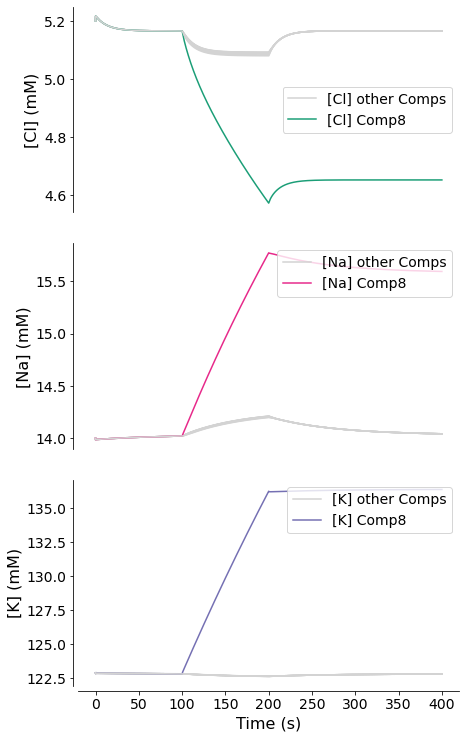

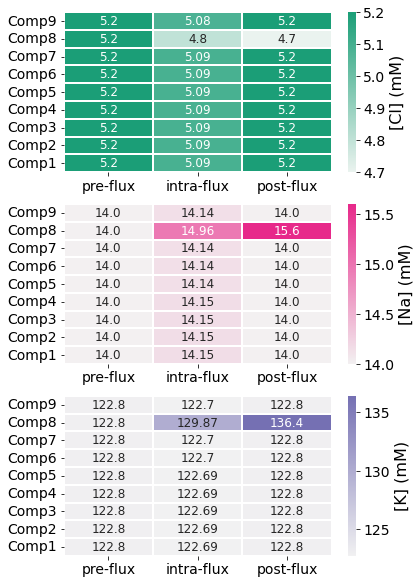

In [13]:
########################################
# GUI
########################################

btn_f2_ion = widgets.Button(description="Plot 2_ions", button_style='info')
output_f2_ion = widgets.Output()

display(btn_f2_ion, output_f2_ion)
global cl_cmap,na_cmap,k_cmap
cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
na_cmap = sns.light_palette('#e7298a', as_cmap=True)
k_cmap = sns.light_palette('#7570b3' , as_cmap=True)

########################################
# BACKEND
########################################
def btn_f2_ion_clicked(b):
    
    
    f2_line, [ax_cl_line,ax_na_line,ax_k_line] = mplt.subplots(3,1, figsize= (6,10),sharex=False)
    f2_heat, [ax_cl_heat, ax_na_heat,ax_k_heat] =  mplt.subplots(3,1, figsize= (6,10),sharex=False)



    f2_line.tight_layout(pad=1)
                                        
    na_heat_arr, cl_heat_arr, k_heat_arr = [],[],[]                                       
   
    for i in range(len(master_arr)):
        
        na_arr = [master_arr[i][j][4]*1e3 for j in range(len(master_arr[8]))] 
        k_arr =  [master_arr[i][j][5]*1e3 for j in range(len(master_arr[8]))] 
        cl_arr = [master_arr[i][j][6]*1e3 for j in range(len(master_arr[8]))] 
        
        
        
        if i == 7:
            na_color,cl_color,k_color =  '#e7298a', '#1b9e77', '#7570b3' 
            ax_cl_line.plot(t_arr[:],cl_arr[:],color = cl_color,label = "[Cl] Comp8")
            ax_na_line.plot(t_arr[:],na_arr[:],color = na_color,label = "[Na] Comp8")
            ax_k_line.plot(t_arr[:],k_arr[:],color = k_color,label = "[K] Comp8")
        
        elif i == 1:
            cl_color, na_color, k_color = '#D3D3D3' ,'#D3D3D3' , '#D3D3D3' 
            ax_cl_line.plot(t_arr[:],cl_arr[:],color = cl_color,label='[Cl] other Comps')
            ax_na_line.plot(t_arr[:],na_arr[:],color = na_color, label='[Na] other Comps')
            ax_k_line.plot(t_arr[:],k_arr[:],color = k_color, label='[K] other Comps')    
        else:
            cl_color, na_color, k_color = '#D3D3D3' ,'#D3D3D3' , '#D3D3D3' 
            ax_cl_line.plot(t_arr[:],cl_arr[:],color = cl_color)
            ax_na_line.plot(t_arr[:],na_arr[:],color = na_color)
            ax_k_line.plot(t_arr[:],k_arr[:],color = k_color)

    
        temp = [round(cl_arr[pre_flux_int],1),round(cl_arr[intra_flux_int],2),round(cl_arr[post_flux_int],1)]
        cl_heat_arr.append(temp)
        temp = [round(na_arr[pre_flux_int],1),round(na_arr[intra_flux_int],2),round(na_arr[post_flux_int],1)]
        na_heat_arr.append(temp)
        temp = [round(k_arr[pre_flux_int],1),round(k_arr[intra_flux_int],2),round(k_arr[post_flux_int],1)]
        k_heat_arr.append(temp)
    
    ax_cl_line.xaxis.set_ticks([])
    ax_cl_line.spines['bottom'].set_visible(False)
    sns.despine(ax=ax_cl_line,bottom = True, offset=5)
    ax_cl_line.legend(loc='center right',fontsize=14)
    ax_cl_line.set_ylabel("[Cl] (mM)",fontsize=16)
    ax_cl_line.tick_params(axis='y', which='major', labelsize=14)
    
    
    ax_na_line.xaxis.set_ticks([])
    ax_na_line.spines['bottom'].set_visible(False)
    sns.despine(ax=ax_na_line,bottom =True, offset=5)
    ax_na_line.legend(loc='upper right',fontsize=14)
    ax_na_line.set_ylabel("[Na] (mM)",fontsize=16)
    ax_na_line.tick_params(axis='y', which='major', labelsize=14)

    sns.despine(ax=ax_k_line, offset=5)
    ax_k_line.legend(loc='upper right',fontsize=14)
    ax_k_line.set_ylabel("[K] (mM)",fontsize=16)
    ax_k_line.set_xlabel("Time (s)",fontsize=16)
    ax_k_line.tick_params(axis='x', which='major', labelsize=14)
    ax_k_line.tick_params(axis='y', which='major', labelsize=14)
    
    
    cl_heat_arr.reverse()
    na_heat_arr.reverse()
    k_heat_arr.reverse()
    heat_x_arr = ["pre-flux","intra-flux","post-flux"]
    
    g = sns.heatmap(na_heat_arr,cmap=na_cmap,xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_na_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[Na] (mM)',fontsize=16)
    
    g = sns.heatmap(cl_heat_arr,cmap=cl_cmap,xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_cl_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[Cl] (mM)',fontsize=16)
    
    g = sns.heatmap(k_heat_arr,cmap=k_cmap,xticklabels=True,yticklabels=True, annot=True,fmt="",annot_kws={"size":12},
                    cbar_kws={'pad':0.05,'orientation':'vertical' }, ax=ax_k_heat, linewidth=0.01 )
    g.set_yticklabels(comp_names_arr[::-1], fontsize=14, rotation=0)
    g.set_xticklabels(heat_x_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('[K] (mM)',fontsize=16)
    
    """   
    
 
    g_lower_left = sns.heatmap(lower_left_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=left_ax_lower,linewidth=0.01 )
    #g_lower_left.set_ylabel("Compartment",fontsize=10)
    g_lower_left.set_yticklabels(comp_names_arr[::-1], fontsize=10, rotation=0)
    left_ax_lower.set_title("Cl- conc. ",fontsize=10)
    
    g_lower_mid = sns.heatmap(lower_mid_arr,cmap="Reds",xticklabels=False,yticklabels=False, cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=mid_ax_lower,linewidth=0.01 )
    #g_lower_mid.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    mid_ax_lower.set_title("Na+ conc. ",fontsize=10)
    
    g_lower_right = sns.heatmap(lower_right_arr,cmap="Blues",xticklabels=False,yticklabels=False,  cbar_kws={'pad':0.05,'label':'Concentration (mM)', 'orientation':'vertical' }, ax=right_ax_lower, linewidth=0.01 )
    #g_lower_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    right_ax_lower.set_title("K+ conc. ",fontsize=10)

   """
    
########################################
# IMPLEMENTATION
########################################
btn_f2_ion.on_click(btn_f2_ion_clicked)

## FIGURE 2B - Comparing ionic conc. changes through various channels

Button(button_style='info', description='Plot 2B line graphs', style=ButtonStyle())

Output()

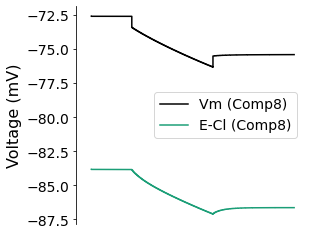

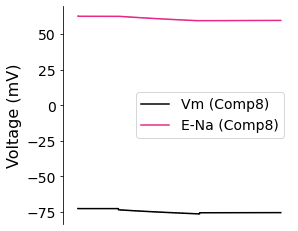

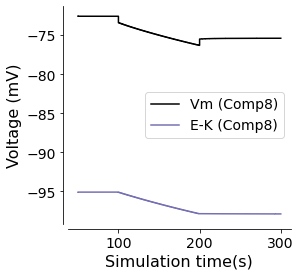

In [17]:
########################################
# GUI
########################################

btn_f2b = widgets.Button(description="Plot 2B line graphs", button_style='info')
output_f2b = widgets.Output()

display(btn_f2b, output_f2b)

sns.reset_orig()


########################################
# BACKEND
########################################

def btn_f2b_clicked(b):

    cl_graph, ax_cl = mplt.subplots(1,1, figsize=(4,4))
    na_graph, ax_na = mplt.subplots(1,1, figsize=(4,4))
    k_graph,ax_k = mplt.subplots(1,1, figsize=(4,4)) 
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    x_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
    
    
    
    
    ###### COMP-8 GRAPHS
    
    ek_arr = [ master_arr[7][i][-2]*1e3 for i in range(len(master_arr[8])) ]
    ena_arr = [ (-1*RTF * np.log(master_arr[7][i][4]/145e-3))*1e3 for i in range(len(master_arr[8]))]
    ecl_arr = [ master_arr[7][i][-1]*1e3 for i in range(len(master_arr[8])) ]
    vm_arr = [ master_arr[7][i][-3]*1e3 for i in range(len(master_arr[8])) ]
    
    ax_cl.plot(x_arr[start_int:end_int],vm_arr[start_int:end_int], label='Vm (Comp8)', color = '#000000')
    ax_cl.plot(x_arr[start_int:end_int],ecl_arr[start_int:end_int], label ='E-Cl (Comp8)', color ='#1b9e77')
    ax_cl.legend(fontsize=14)
    ax_cl.xaxis.set_ticks([])
    ax_cl.tick_params(axis='y', which='major', labelsize=14)
    ax_cl.set_ylabel("Voltage (mV)",fontsize=16)
    sns.despine(ax=ax_cl,bottom=True,offset=5)
    
    ax_na.plot(x_arr[start_int:end_int],vm_arr[start_int:end_int], label='Vm (Comp8)', color = '#000000')
    ax_na.plot(x_arr[start_int:end_int],ena_arr[start_int:end_int], label ='E-Na (Comp8)',color ='#e7298a')
    ax_na.legend(fontsize=14)
    ax_na.xaxis.set_ticks([])
    ax_na.xaxis.set_tick_params(labelsize=12)
    ax_na.tick_params(axis='y', which='major', labelsize=14)
    ax_na.set_ylabel("Voltage (mV)",fontsize=16)
    sns.despine(ax=ax_na,bottom=True,offset=5)
    
    ax_k.plot(x_arr[start_int:end_int],vm_arr[start_int:end_int], label='Vm (Comp8)', color = '#000000')
    ax_k.plot(x_arr[start_int:end_int],ek_arr[start_int:end_int], label ='E-K (Comp8)',color ='#7570b3')
    ax_k.legend(fontsize=14)
    ax_k.set_ylabel("Voltage (mV)",fontsize=16)
    ax_k.set_xlabel("Simulation time(s)",fontsize=16)
    ax_k.tick_params(axis='y', which='major', labelsize=14)
    ax_k.tick_params(axis='x', which='major', labelsize=14)
    sns.despine(ax=ax_k,bottom=False,offset=5)
   
    cl_graph.savefig('cl_line_graph.jpeg', bbox_inches='tight',dpi=600)
    na_graph.savefig('na_line_graph.jpeg', bbox_inches='tight',dpi=600)
    k_graph.savefig('k_line_graph.jpeg', bbox_inches='tight',dpi=600)
    
# IMPLEMENTATION
########################################

btn_f2b.on_click(btn_f2b_clicked)

Button(button_style='info', description='Plot 2B heatmaps', style=ButtonStyle())

Output()

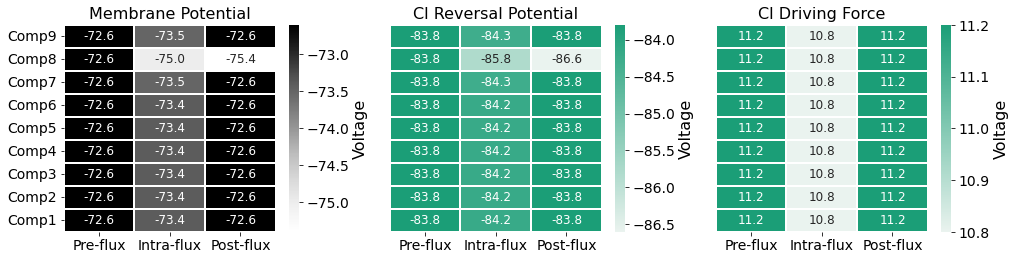

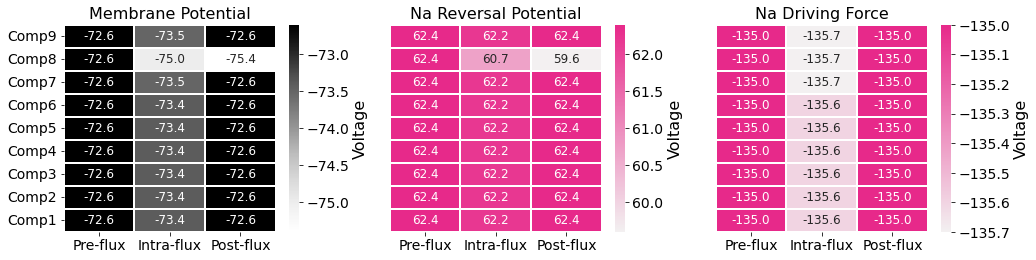

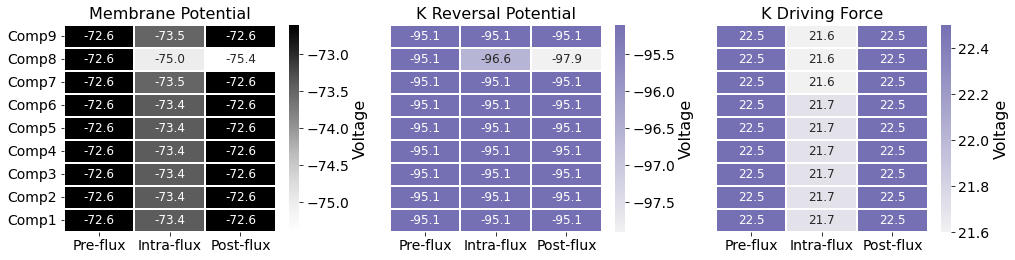

In [18]:
########################################
# GUI
########################################

btn_f2b_heat = widgets.Button(description="Plot 2B heatmaps", button_style='info')
output_f2b_heat = widgets.Output()

display(btn_f2b_heat, output_f2b_heat)

sns.reset_orig()


########################################
# BACKEND
########################################

def btn_f2b_heat_clicked(b):

    f2_cl, ([ax_vm1,ax_ecl,ax_dfcl]) = mplt.subplots(1,3, figsize=(14,4))
    f2_cl.tight_layout(pad=3)
    f2_na, ([ax_vm2,ax_ena,ax_dfna])= mplt.subplots(1,3, figsize=(14,4))
    f2_na.tight_layout(pad=3)
    f2_k, ([ax_vm3,ax_ek,ax_dfk]) = mplt.subplots(1,3, figsize=(14,4))
    f2_k.tight_layout(pad=3)
    
    R = 8.31446
    F: float = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F
    
    x_arr = [round(t_arr[i]) for i in range(len(t_arr))]
    
    
    ####### HEAT MAPS
    
    

    vm_arr = []
    ecl_arr, ena_arr, ek_arr = [],[],[]
    cldf_arr, nadf_arr, kdf_arr = [],[],[]
    

    for i in range(len(comp_names_arr)):
        
        vm = [round(master_arr[i][j][-3]*1e3,1) for j in range(len(master_arr[0]))] 
        temp = [vm[pre_flux_int],vm[intra_flux_int],vm[post_flux_int]]
        vm_arr.append(temp)
        
        ## Cl
        ecl = [round(master_arr[i][j][-1]*1e3,1) for j in range(len(master_arr[0]))] 
        temp = [ecl[pre_flux_int],ecl[intra_flux_int],ecl[post_flux_int]]
        ecl_arr.append(temp)
        
        temp = [round(vm[pre_flux_int]-ecl[pre_flux_int],1),round(vm[intra_flux_int]-ecl[intra_flux_int],1),round(vm[post_flux_int]-ecl[post_flux_int],1)]
        cldf_arr.append(temp)
        
        ## Na
        ena = [round((-1*RTF * np.log(master_arr[i][j][4]/145e-3))*1e3,1) for j in range(len(master_arr[8]))]
        temp = [ena[pre_flux_int],ena[intra_flux_int],ena[post_flux_int]]
        ena_arr.append(temp)
        
        temp = [round(vm[pre_flux_int]-ena[pre_flux_int],1),round(vm[intra_flux_int]-ena[intra_flux_int],1), 
                         round(vm[pre_flux_int]-ena[pre_flux_int],1)]
        nadf_arr.append(temp)
        
        ## K
        ek = [round(master_arr[i][j][-2]*1e3,1) for j in range(len(master_arr[0]))] 
        temp = [ek[pre_flux_int],ek[intra_flux_int],ek[post_flux_int]]
        ek_arr.append(temp)
        
        temp = [round(vm[pre_flux_int]-ek[pre_flux_int],1),round(vm[intra_flux_int]-ek[intra_flux_int],1),round(vm[post_flux_int]-ek[post_flux_int],1)]
        kdf_arr.append(temp)
    
    vm_arr.reverse()
    ecl_arr.reverse()
    cldf_arr.reverse()
    ena_arr.reverse()
    nadf_arr.reverse()
    ek_arr.reverse()
    kdf_arr.reverse()
        
    
    ####################
    grey_heatmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    
    xlabel_arr =["Pre-flux","Intra-flux","Post-flux"]
    comp_names_arr_r = comp_names_arr[::-1]
    
    g_vm = sns.heatmap(vm_arr,cmap="Greys",yticklabels=True, xticklabels=True,annot=True,annot_kws={"size":12},fmt="",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_vm1,linewidth=0.01 )
    g_vm.set_yticklabels(comp_names_arr_r, fontsize=14, rotation=0) 
    g_vm.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_vm.set_title("Membrane Potential",fontsize=16)
    cbar = g_vm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_ecl = sns.heatmap(ecl_arr,cmap=cl_cmap,xticklabels=True,yticklabels=False, annot=True,annot_kws={"size":12},fmt="" , cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_ecl,linewidth=0.01 )   
    g_ecl.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_ecl.set_title("Cl Reversal Potential",fontsize=16)
    cbar = g_ecl.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_cldf = sns.heatmap(cldf_arr,cmap=cl_cmap,xticklabels=True, yticklabels=False, annot=True,annot_kws={"size":12},fmt="" ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_dfcl,linewidth=0.01 )
    g_cldf.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_cldf.set_title("Cl Driving Force",fontsize=16)
    cbar = g_cldf.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_vm = sns.heatmap(vm_arr,cmap="Greys",yticklabels=True, xticklabels=True,annot=True,annot_kws={"size":12},fmt="",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_vm2,linewidth=0.01 )
    g_vm.set_yticklabels(comp_names_arr_r, fontsize=14, rotation=0) 
    g_vm.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_vm.set_title("Membrane Potential",fontsize=16)
    cbar = g_vm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_ena = sns.heatmap(ena_arr,cmap=na_cmap,xticklabels=True, yticklabels=False,  annot=True,annot_kws={"size":12},fmt=""  ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_ena,linewidth=0.01 )
    g_ena.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_ena.set_title("Na Reversal Potential",fontsize=16)
    cbar = g_ena.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_nadf = sns.heatmap(nadf_arr,cmap=na_cmap,xticklabels=True, yticklabels=False, annot=True,annot_kws={"size":12},fmt=""  ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_dfna,linewidth=0.01 )
    g_nadf.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_nadf.set_title("Na Driving Force",fontsize=16)
    cbar = g_nadf.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_vm = sns.heatmap(vm_arr,cmap="Greys",yticklabels=True, xticklabels=True,annot=True,annot_kws={"size":12},fmt="",  cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_vm3,linewidth=0.01 )
    g_vm.set_yticklabels(comp_names_arr_r, fontsize=14, rotation=0)
    g_vm.set_xticklabels(xlabel_arr, fontsize=14, rotation=0) 
    g_vm.set_title("Membrane Potential",fontsize=16)
    cbar = g_vm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_ek = sns.heatmap(ek_arr,cmap=k_cmap,xticklabels=True, yticklabels=False,  annot=True,annot_kws={"size":12},fmt=""  ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical'}, ax=ax_ek,linewidth=0.01 )
    g_ek.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    g_ek.set_title("K Reversal Potential",fontsize=16)
    cbar = g_ek.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    g_kdf = sns.heatmap(kdf_arr,cmap=k_cmap,xticklabels=True, yticklabels=False, annot=True,fmt="",annot_kws={"size":12} ,cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'vertical' }, ax=ax_dfk,linewidth=0.01 )
    g_kdf.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    g_kdf.set_title("K Driving Force",fontsize=16)
    cbar = g_kdf.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage",fontsize=16)
    
    f2_cl.savefig('cl_tm_heatmaps.jpeg', bbox_inches='tight',dpi=600)
    f2_na.savefig('na_tm_heatmaps.jpeg', bbox_inches='tight',dpi=600)
    f2_k.savefig('k_tm_heatmaps.jpeg', bbox_inches='tight',dpi=600)
    

# IMPLEMENTATION
########################################

btn_f2b_heat.on_click(btn_f2b_heat_clicked)

## FIGURE 2C - Total flux comparison

Button(button_style='info', description='Plot 2c', style=ButtonStyle())

Output()

Start time = 49.999999965778784
End time = 399.9599990822147


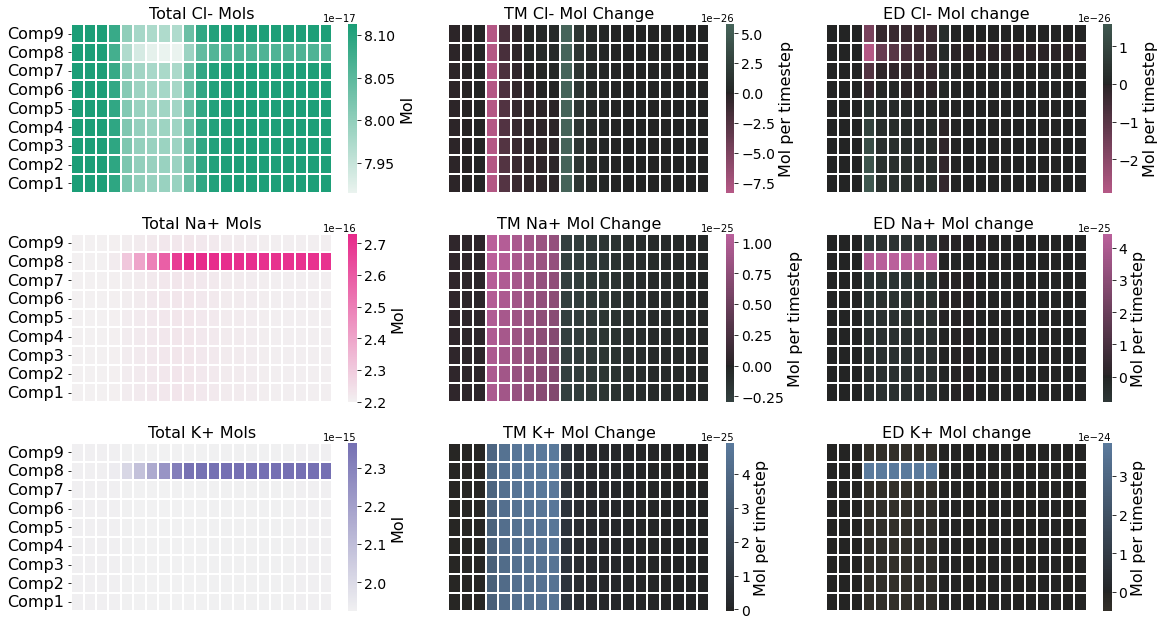

In [51]:
########################################
# GUI
########################################

btn_f2c = widgets.Button(description="Plot 2c", button_style='info')
output_f2c = widgets.Output()

display(btn_f2c, output_f2c)
cl_cmap = sns.light_palette('#1b9e77', as_cmap=True)
na_cmap = sns.light_palette('#e7298a', as_cmap=True)
k_cmap = sns.light_palette('#7570b3' , as_cmap=True)


########################################
# BACKEND
########################################

def btn_f2c_clicked(b):
    
    
    f2e,([ax_cl, ax_cl_tm,ax_cl_ed],[ax_na, ax_na_tm,ax_na_ed],[ax_k, ax_k_tm,ax_k_ed]) = mplt.subplots(3,3,figsize=(16,9))
    f2e.tight_layout(pad=2.0)
    
    cl_divcmap = sns.diverging_palette(342, 162,l=50,s=50, center='dark', as_cmap=True)
    na_divcmap = sns.diverging_palette(186, 329,l=53,s=50, center='dark', as_cmap=True) 
    k_divcmap = sns.diverging_palette(64, 244,l=50,s=50, center='dark', as_cmap=True)
     
    cl_arr,na_arr, k_arr = [],[],[]
    cl_tm_arr, na_tm_arr, k_tm_arr = [], [], []
    
    
    bins = 20
    heat_start_int = 1250
    heat_end_int = 9999
    heat_total_int = heat_end_int - heat_start_int
    bin_int = round(heat_total_int/bins)
    print(f"Start time = {t_arr[heat_start_int]}")
    print(f"End time = {t_arr[heat_end_int]}")
    

    for i in range(len(comp_names_arr),0,-1):
        
        temp_arr_cl = [master_arr[i-1][j][6] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[heat_start_int:heat_end_int:bin_int]
        cl_arr.append(temp_arr_cl)
        
        temp_arr_cl = [master_arr[i-1][j][-6] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[heat_start_int:heat_end_int:bin_int]
        cl_tm_arr.append(temp_arr_cl)
        
        temp_arr_na = [master_arr[i-1][j][4] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_na = temp_arr_na[heat_start_int:heat_end_int:bin_int]
        na_arr.append(temp_arr_na)
        
        temp_arr_na = [master_arr[i-1][j][9] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_na = temp_arr_na[heat_start_int:heat_end_int:bin_int]
        na_tm_arr.append(temp_arr_na)
        
        temp_arr_k = [master_arr[i-1][j][5] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_k = temp_arr_k[heat_start_int:heat_end_int:bin_int]
        k_arr.append(temp_arr_k)
        
        temp_arr_k = [master_arr[i-1][j][-10] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_k = temp_arr_k[heat_start_int:heat_end_int:bin_int]
        k_tm_arr.append(temp_arr_k)
    
    
    g = sns.heatmap(cl_arr,cmap=cl_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'vertical' }, ax=ax_cl,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=16, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol",fontsize=16)
    ax_cl.set_title("Total Cl- Mols",fontsize=16)
    
    g = sns.heatmap(na_arr,yticklabels=True, cmap=na_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'vertical'}, ax=ax_na,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=16, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol",fontsize=16)
    ax_na.set_title("Total Na+ Mols",fontsize=16)
    
    g = sns.heatmap(k_arr,yticklabels=True,cmap=k_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'vertical' }, ax=ax_k,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=16, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol",fontsize=16)
    ax_k.set_title("Total K+ Mols",fontsize=16)
    
    
    g = sns.heatmap(cl_tm_arr,cmap=cl_divcmap,center=0.00,xticklabels=False, yticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol per time step', 'orientation':'vertical'}, ax=ax_cl_tm,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol per timestep",fontsize=16)
    ax_cl_tm.set_title("TM Cl- Mol Change",fontsize=16)
    
    g = sns.heatmap(na_tm_arr,yticklabels=False, center=0.00 ,cmap=na_divcmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol per time step', 'orientation':'vertical' }, ax=ax_na_tm,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol per timestep",fontsize=16)
    ax_na_tm.set_title("TM Na+ Mol Change",fontsize=16)
    
    
    g = sns.heatmap(k_tm_arr,yticklabels=False,center=0.00,cmap=k_divcmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol per time step', 'orientation':'vertical' }, ax=ax_k_tm,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol per timestep",fontsize=16)
    ax_k_tm.set_title("TM K+ Mol Change",fontsize=16)
    
    na_ed_arr, k_ed_arr, cl_ed_arr = [],[],[]
    
    for i in range(len(comp_names_arr)):
        
 
        if i == 8:
            na_ed = [-ED_master_arr[i-1][j][0]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            k_ed = [-ED_master_arr[i-1][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [-ED_master_arr[i-1][j][2]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
        elif i == 0: 
            na_ed = [ED_master_arr[i][j][0] /master_arr[i][j][2]for j in range(len(ED_master_arr[0]))]
            k_ed = [ED_master_arr[i][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [ED_master_arr[i][j][2] /master_arr[i][j][2]for j in range(len(ED_master_arr[0]))]
        else:
            na_ed = [ED_master_arr[i][j][0]/master_arr[i][j][2] - ED_master_arr[i-1][j][0]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            k_ed = [ED_master_arr[i][j][1]/master_arr[i][j][2]- ED_master_arr[i-1][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [ED_master_arr[i][j][2]/master_arr[i][j][2] - ED_master_arr[i-1][j][2]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
    
        na_ed_arr.append(na_ed[heat_start_int:heat_end_int:bin_int])
        k_ed_arr.append(k_ed[heat_start_int:heat_end_int:bin_int])
        cl_ed_arr.append(cl_ed[heat_start_int:heat_end_int:bin_int]) 
        
    cl_ed_arr.reverse()
    na_ed_arr.reverse()
    k_ed_arr.reverse()
        
    
    #bound_names_arr = [comp_names_arr[i] + ' <-> ' + comp_names_arr[i+1] for i in range(len(comp_names_arr)-2,0,-1)]
    g = sns.heatmap(cl_ed_arr,cmap=cl_divcmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol per time step', 'orientation':'vertical'}, ax=ax_cl_ed,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    #g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol per timestep",fontsize=16)
    ax_cl_ed.set_title("ED Cl- Mol change",fontsize=16)
    
    g = sns.heatmap(na_ed_arr,cmap=na_divcmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol per time step', 'orientation':'vertical' }, ax=ax_na_ed,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_lower_mid.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol per timestep",fontsize=16)
    ax_na_ed.set_title("ED Na+ Mol change ",fontsize=16)
    
    g = sns.heatmap(k_ed_arr,cmap=k_divcmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol per time step', 'orientation':'vertical' }, ax=ax_k_ed,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_lower_right.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Mol per timestep",fontsize=16)
    ax_k_ed.set_title("ED K+ Mol change",fontsize=16)
    
   
    
    
btn_f2c.on_click(btn_f2c_clicked)

## F2D - Boundary voltages

Button(button_style='info', description='Plot 2d', style=ButtonStyle())

Output()

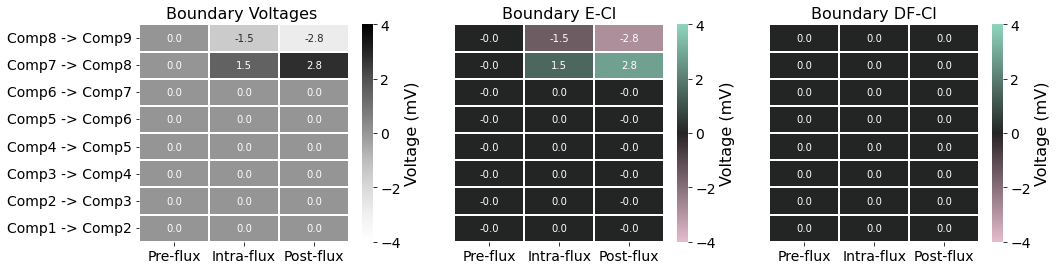

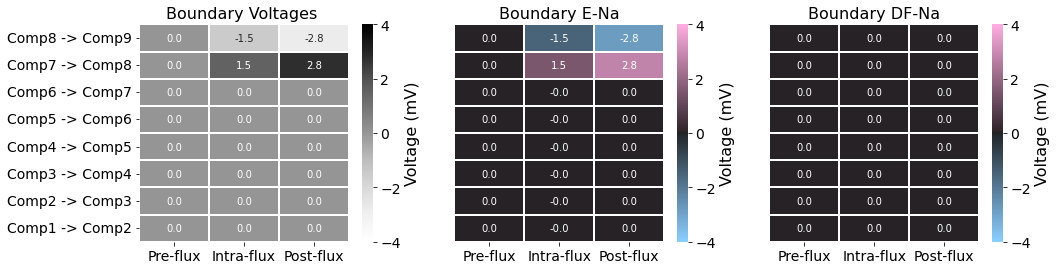

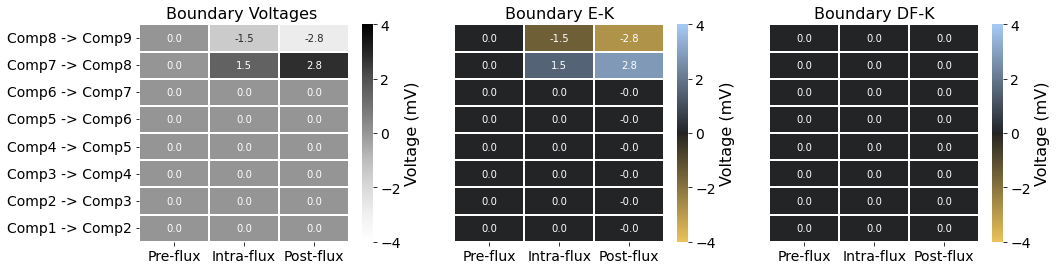

In [59]:
########################################
# GUI
########################################

btn_f2d = widgets.Button(description="Plot 2d", button_style='info')
output_f2d = widgets.Output()

display(btn_f2d, output_f2d)


sample_arr = [pre_flux_int,intra_flux_int,post_flux_int]
########################################
# BACKEND
########################################

def btn_f2d_clicked(b):
        
    global RTF
    R = 8.31446
    F = 96485.33  # Faraday's constant        C mol-1
    T = 37 + 273.15
    RTF = R * T / F

    
    f2d_cl, [ax_vb1,ax_b_ecl,ax_b_dfcl] = mplt.subplots(1,3,figsize=(16,4))
    f2d_na, [ax_vb2,ax_b_ena,ax_b_dfna] = mplt.subplots(1,3,figsize=(16,4))
    f2d_k, [ax_vb3,ax_b_ek,ax_b_dfk] = mplt.subplots(1,3,figsize=(16,4))
    
    cl_divcmap = sns.diverging_palette(342, 162,l=80,s=50, center='dark', as_cmap=True)
    na_divcmap = sns.diverging_palette(237, 329,l=80,s=100, center='dark', as_cmap=True) 
    k_divcmap = sns.diverging_palette(64, 244,l=80,s=80, center='dark', as_cmap=True)
    
    cl_bdf_arr, na_bdf_arr, k_bdf_arr = [],[],[]
    vb_arr = []
    b_ecl_arr,b_ena_arr,b_ek_arr = [],[],[]
    b_dfcl_arr,b_dfna_arr,b_dfk_arr = [],[],[]
    
    

    for i in range(0,len(ED_master_arr)):
        
        vb_temp = []
        b_ecl_temp = []
        b_ena_temp = []
        b_ek_temp = []
        b_dfcl_temp = []
        b_dfk_temp = []
        b_dfna_temp = []
        for j in sample_arr:
            
            vb = round((master_arr[i][j][-3] - master_arr[i+1][j][-3]) *1e3,1)
            vb_temp.append(vb)
            b_ecl = round((-RTF * np.log(master_arr[i+1][j][6] / master_arr[i][j][6]))*1e3,1)
            b_ecl_temp.append(b_ecl)
            b_ena = round((RTF * np.log(master_arr[i+1][j][4] / master_arr[i][j][4]))*1e3,1)
            b_ena_temp.append(b_ena)
            b_ek = round((RTF * np.log(master_arr[i+1][j][5] / master_arr[i][j][5]))*1e3,1)
            b_ek_temp.append(b_ek)
            b_dfcl_temp.append(round(vb-b_ecl,1))
            b_dfna_temp.append(round(vb-b_ena,1))
            b_dfk_temp.append(round(vb-b_ek,1))
            
        vb_arr.append(vb_temp)
        b_ecl_arr.append(b_ecl_temp)

        b_ena_arr.append(b_ena_temp)
        b_ek_arr.append(b_ek_temp)

        b_dfcl_arr.append(b_dfcl_temp)
        b_dfna_arr.append(b_dfna_temp)
        b_dfk_arr.append(b_dfk_temp)

        """
        ecl_bound = [RTF * np.log(master_arr[i-1][j][6] / master_arr[i][j][6]) for j in range(len(t_arr))]
        temp_bdf = [(v_bound[j] - ecl_bound[j])*1e3 for j in range(len(v_bound))]
        temp_bdf = temp_bdf[:25000:1000]
        cl_bdf_arr.append(temp_bdf)
        
        ena_bound = [RTF * np.log(master_arr[i-1][j][4] / master_arr[i][j][4]) for j in range(len(t_arr))]
        temp_bdf = [(v_bound[j] - ena_bound[j])*1e3 for j in range(len(v_bound))]
        temp_bdf = temp_bdf[:25000:1000]
        na_bdf_arr.append(temp_bdf)
        
        ek_bound = [RTF * np.log(master_arr[i-1][j][5] / master_arr[i][j][5]) for j in range(len(t_arr))]
        temp_bdf = [(v_bound[j] - ena_bound[j])*1e3 for j in range(len(v_bound))]
        temp_bdf = temp_bdf[:25000:1000]
        k_bdf_arr.append(temp_bdf)
        """

    vb_arr.reverse()
    b_ecl_arr.reverse()
    b_ena_arr.reverse()
    b_ek_arr.reverse()
    b_dfcl_arr.reverse()
    b_dfna_arr.reverse()
    b_dfk_arr.reverse()
  
    bound_names_arr = [comp_names_arr[i] + ' -> ' + comp_names_arr[i+1] for i in range(len(comp_names_arr)-1)]
    xlabel_arr =["Pre-flux","Intra-flux","Post-flux"]
    
    g = sns.heatmap(vb_arr,cmap="Greys",annot=True,vmin=-4,vmax=4,xticklabels=True,  fmt='',cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vb1,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(bound_names_arr[::-1], fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    ax_vb1.set_title("Boundary Voltages ",fontsize=16)
    ax_vb1.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    
    g = sns.heatmap(b_ecl_arr,cmap=cl_divcmap,annot=True,vmin=-4,vmax=4,xticklabels=True,fmt='', yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_b_ecl,linewidth=0.01 )
    ax_b_ecl.set_title("Boundary E-Cl",fontsize=16)
    ax_b_ecl.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)

    g = sns.heatmap(b_dfcl_arr,cmap=cl_divcmap,annot=True,vmin=-4,vmax=4,xticklabels=True,fmt='', yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_b_dfcl,linewidth=0.01 )
    ax_b_dfcl.set_title("Boundary DF-Cl",fontsize=16)
    ax_b_dfcl.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g = sns.heatmap(vb_arr,cmap="Greys",annot=True,vmin=-4,vmax=4,xticklabels=True,fmt='',  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vb2,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(bound_names_arr[::-1], fontsize=14, rotation=0)
    ax_vb2.set_title("Boundary Voltages ",fontsize=16)
    ax_vb2.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g = sns.heatmap(b_ena_arr,cmap=na_divcmap,annot=True,vmin=-4,vmax=4,xticklabels=True,fmt='', yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_b_ena,linewidth=0.01 )
    ax_b_ena.set_title("Boundary E-Na",fontsize=16)
    ax_b_ena.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)

    g = sns.heatmap(b_dfna_arr,cmap=na_divcmap,vmin=-4,vmax=4,annot=True,xticklabels=True,fmt='', yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_b_dfna,linewidth=0.01 )
    ax_b_dfna.set_title("Boundary DF-Na",fontsize=16)
    ax_b_dfna.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g = sns.heatmap(vb_arr,cmap="Greys",annot=True,vmin=-4,vmax=4,xticklabels=True, fmt='', cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_vb3,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(bound_names_arr[::-1], fontsize=14, rotation=0)
    ax_vb3.set_title("Boundary Voltages ",fontsize=16)
    ax_vb3.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    g = sns.heatmap(b_ek_arr,cmap=k_divcmap,annot=True,vmin=-4,vmax=4,xticklabels=True,fmt='', yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_b_ek,linewidth=0.01 )
    ax_b_ek.set_title("Boundary E-K",fontsize=16)
    ax_b_ek.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)

    g = sns.heatmap(b_dfk_arr,cmap=k_divcmap,vmin=-4,vmax=4,annot=True,xticklabels=True, fmt='',yticklabels=False,  cbar_kws={'pad':0.05,'label':'Voltage (mV)', 'orientation':'vertical' }, ax=ax_b_dfk,linewidth=0.01 )
    ax_b_dfk.set_title("Boundary DF-K",fontsize=16)
    ax_b_dfk.set_xticklabels(xlabel_arr, fontsize=14, rotation=0)
    cbar = g.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Voltage (mV)",fontsize=16)
    
    f2d_cl.savefig('f2d_cl_boundary.jpeg', bbox_inches='tight',dpi=600)
    f2d_na.savefig('f2d_na_boundary.jpeg', bbox_inches='tight',dpi=600)
    f2d_k.savefig('f2d_k_boundary.jpeg', bbox_inches='tight',dpi=600)

    
    
btn_f2d.on_click(btn_f2d_clicked)

Button(button_style='info', description='Plot 2d', style=ButtonStyle())

Output()

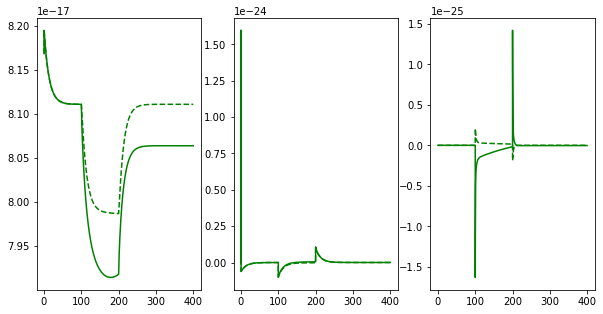

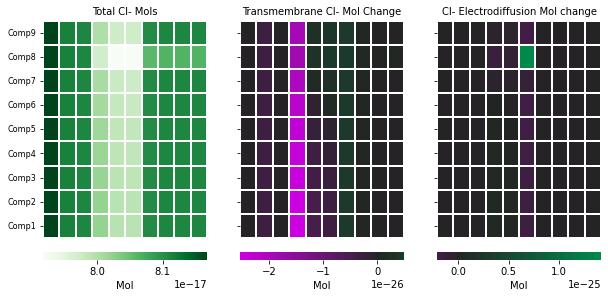

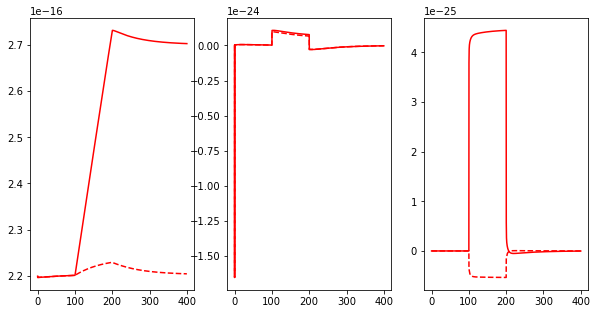

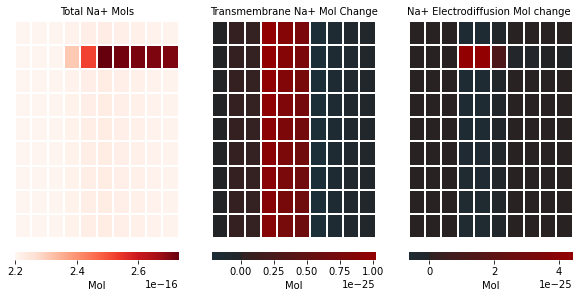

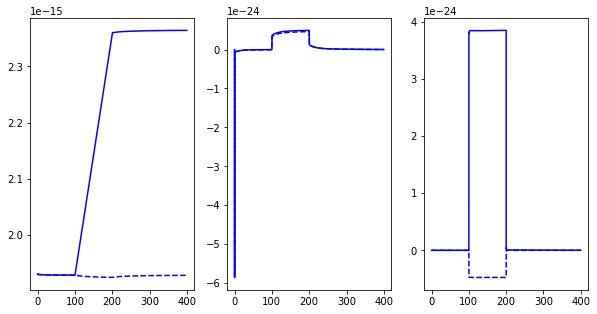

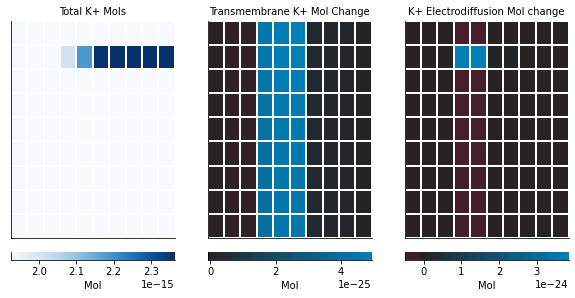

In [9]:
########################################
# GUI
########################################

btn_f2d = widgets.Button(description="Plot 2d", button_style='info')
output_f2d = widgets.Output()

display(btn_f2d, output_f2d)


########################################
# BACKEND
########################################

def btn_f2d_clicked(b):
    
    
    
    
    ########################################
    # CHLORIDE GRAPHS
    ########################################
    
    f2cl_g, [ax_cl_graph, ax_cl_tm_graph,ax_cl_ed_graph] = mplt.subplots(1,3, figsize=(10,5),sharex=True)
    f2cl_h, [ax_cl, ax_cl_tm,ax_cl_ed] = mplt.subplots(1,3, figsize=(10,5),sharex=True,sharey=True)

    cl_cmap = sns.diverging_palette(300, 140,l=50,s=100, center='dark', as_cmap=True)
    
    cl_8_arr = [master_arr[7][j][6] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    cl_4_arr = [master_arr[3][j][6] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_cl_graph.plot(t_arr, cl_8_arr,color='green',label='Comp8')
    ax_cl_graph.plot(t_arr, cl_4_arr,'--',color='green',label='Comp4')
    
    cl_8_tm_arr = [master_arr[7][j][-6] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    cl_4_tm_arr = [master_arr[3][j][-6] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_cl_tm_graph.plot(t_arr, cl_8_tm_arr,color='green',label='Comp8')
    ax_cl_tm_graph.plot(t_arr, cl_4_tm_arr,'--',color='green',label='Comp4')
    
    #######################################
    # SODIUM GRAPHS
    #######################################
    
    f2na_g, [ax_na_graph, ax_na_tm_graph,ax_na_ed_graph] = mplt.subplots(1,3, figsize=(10,5),sharex=True)
    f2na_h, [ax_na, ax_na_tm,ax_na_ed] = mplt.subplots(1,3, figsize=(10,5),sharex=False,sharey=True)
    
    na_cmap = sns.diverging_palette(240, 12,l=30,s=100, center='dark', as_cmap=True) 
    
    na_8_arr = [master_arr[7][j][4] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    na_4_arr = [master_arr[3][j][4] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_na_graph.plot(t_arr, na_8_arr,color='red',label='Comp8')
    ax_na_graph.plot(t_arr, na_4_arr,'--',color='red',label='Comp4')
    
    na_8_tm_arr = [master_arr[7][j][9] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    na_4_tm_arr = [master_arr[3][j][9] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_na_tm_graph.plot(t_arr, na_8_tm_arr,color='red',label='Comp8')
    ax_na_tm_graph.plot(t_arr, na_4_tm_arr,'--',color='red',label='Comp4')
    
    
    #######################################
    # POTASSIUM GRAPHS
    #######################################
    
    
    f2k_g, [ax_k_graph, ax_k_tm_graph,ax_k_ed_graph] = mplt.subplots(1,3, figsize=(10,5),sharex=True)
    f2k_h, [ax_k, ax_k_tm,ax_k_ed] = mplt.subplots(1,3, figsize=(10,5),sharey=True)                
     
    k_cmap = sns.diverging_palette(360, 240,l=50,s=100, center='dark', as_cmap=True)
    #f2cl_.tight_layout(pad=3.0)
    #f2na.tight_layout(pad=3.0)
    #f2k.tight_layout(pad=3.0)
    #width =0.3
    
      
    k_8_arr = [master_arr[7][j][5] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    k_4_arr = [master_arr[3][j][5] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_k_graph.plot(t_arr, k_8_arr,color='blue',label='Comp8')
    ax_k_graph.plot(t_arr, k_4_arr,'--',color='blue',label='Comp4')
    
    k_8_tm_arr = [master_arr[7][j][-10] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    k_4_tm_arr = [master_arr[3][j][-10] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_k_tm_graph.plot(t_arr, k_8_tm_arr,color='blue',label='Comp8')
    ax_k_tm_graph.plot(t_arr, k_4_tm_arr,'--',color='blue',label='Comp4')
    

    
    cl_arr,na_arr, k_arr = [],[],[]
    cl_tm_arr, na_tm_arr, k_tm_arr = [], [], []
    
    for i in range(len(comp_names_arr),0,-1):
        
        temp_arr_cl = [master_arr[i-1][j][6] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[:25000:1000]
        cl_arr.append(temp_arr_cl)
        
        temp_arr_cl = [master_arr[i-1][j][-6] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[:25000:1000]
        cl_tm_arr.append(temp_arr_cl)
        
        temp_arr_na = [master_arr[i-1][j][4] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_na = temp_arr_na[:25000:1000]
        na_arr.append(temp_arr_na)
        
        temp_arr_na = [master_arr[i-1][j][9] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_na = temp_arr_na[:25000:1000]
        na_tm_arr.append(temp_arr_na)
        
        temp_arr_k = [master_arr[i-1][j][5] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_k = temp_arr_k[:25000:1000]
        k_arr.append(temp_arr_k)
        
        temp_arr_k = [master_arr[i-1][j][-10] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_k = temp_arr_k[:25000:1000]
        k_tm_arr.append(temp_arr_k)
    
    
    g = sns.heatmap(cl_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_cl,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl.set_title("Total Cl- Mols",fontsize=10)
    
    
    
    
   
 
    
    g = sns.heatmap(na_arr,yticklabels=False, cmap="Reds",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_na,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    ax_na.set_title("Total Na+ Mols",fontsize=10)
    
    g = sns.heatmap(k_arr,yticklabels=False,cmap="Blues",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_k,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    ax_k.set_title("Total K+ Mols",fontsize=10)
    
    
    g = sns.heatmap(cl_tm_arr,cmap=cl_cmap,center=0.00,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_cl_tm,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl_tm.set_title("Transmembrane Cl- Mol Change",fontsize=10)
    
    g = sns.heatmap(na_tm_arr,yticklabels=False, center=0.00 ,cmap=na_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_na_tm,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    ax_na_tm.set_title("Transmembrane Na+ Mol Change",fontsize=10)
    
    
    g = sns.heatmap(k_tm_arr,yticklabels=False,center=0.00,cmap=k_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_k_tm,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    ax_k_tm.set_title("Transmembrane K+ Mol Change",fontsize=10)
    
    #####################################################################################
    # ROW 3 & 4 
    #####################################################################################
    
    na_ed_arr, k_ed_arr, cl_ed_arr = [],[],[]
    
    for i in range(len(comp_names_arr)):
        
 
        if i == 8:
            na_ed = [-ED_master_arr[i-1][j][0]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            k_ed = [-ED_master_arr[i-1][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [-ED_master_arr[i-1][j][2]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
        elif i == 0: 
            na_ed = [ED_master_arr[i][j][0] /master_arr[i][j][2]for j in range(len(ED_master_arr[0]))]
            k_ed = [ED_master_arr[i][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [ED_master_arr[i][j][2] /master_arr[i][j][2]for j in range(len(ED_master_arr[0]))]
        else:
            na_ed = [ED_master_arr[i][j][0]/master_arr[i][j][2] - ED_master_arr[i-1][j][0]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            k_ed = [ED_master_arr[i][j][1]/master_arr[i][j][2]- ED_master_arr[i-1][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [ED_master_arr[i][j][2]/master_arr[i][j][2] - ED_master_arr[i-1][j][2]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
    
        na_ed_arr.append(na_ed[:25000:1000])
        k_ed_arr.append(k_ed[:25000:1000])
        cl_ed_arr.append(cl_ed[:25000:1000]) 
        
    cl_ed_arr.reverse()
    na_ed_arr.reverse()
    k_ed_arr.reverse()
        
    cl_8_ed_arr = [ED_master_arr[7][j][2]/master_arr[7][j][2] - ED_master_arr[6][j][2]/master_arr[7][j][2] for j in range(len(ED_master_arr[0]))]
    cl_4_ed_arr = [ED_master_arr[3][j][2]/master_arr[3][j][2] - ED_master_arr[2][j][2]/master_arr[3][j][2] for j in range(len(ED_master_arr[0]))]
    ax_cl_ed_graph.plot(t_arr[2:], cl_8_ed_arr,color='green',label='Comp8')
    ax_cl_ed_graph.plot(t_arr[2:], cl_4_ed_arr,'--',color='green',label='Comp4')
    
    
    na_8_ed_arr = [ED_master_arr[7][j][0]/master_arr[7][j][2] - ED_master_arr[6][j][0]/master_arr[7][j][2] for j in range(len(ED_master_arr[0]))]
    na_4_ed_arr = [ED_master_arr[3][j][0]/master_arr[3][j][2] - ED_master_arr[2][j][0]/master_arr[3][j][2] for j in range(len(ED_master_arr[0]))]
    ax_na_ed_graph.plot(t_arr[2:], na_8_ed_arr,color='red',label='Comp8')
    ax_na_ed_graph.plot(t_arr[2:], na_4_ed_arr,'--',color='red',label='Comp4')
    
    k_8_ed_arr = [ED_master_arr[7][j][1]/master_arr[7][j][2] - ED_master_arr[6][j][1]/master_arr[7][j][2] for j in range(len(ED_master_arr[0]))]
    k_4_ed_arr = [ED_master_arr[3][j][1]/master_arr[3][j][2] - ED_master_arr[2][j][1]/master_arr[3][j][2] for j in range(len(ED_master_arr[0]))]
    ax_k_ed_graph.plot(t_arr[2:], k_8_ed_arr,color='blue',label='Comp8')
    ax_k_ed_graph.plot(t_arr[2:], k_4_ed_arr,'--',color='blue',label='Comp4')
    
    #bound_names_arr = [comp_names_arr[i] + ' <-> ' + comp_names_arr[i+1] for i in range(len(comp_names_arr)-2,0,-1)]
    g = sns.heatmap(cl_ed_arr,cmap=cl_cmap,center=0.00,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_cl_ed,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl_ed.set_title("Cl- Electrodiffusion Mol change",fontsize=10)
    
    g = sns.heatmap(na_ed_arr,cmap=na_cmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_na_ed,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_lower_mid.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    ax_na_ed.set_title("Na+ Electrodiffusion Mol change ",fontsize=10)
    
    g = sns.heatmap(k_ed_arr,cmap=k_cmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_k_ed,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_lower_right.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    ax_k_ed.set_title("K+ Electrodiffusion Mol change",fontsize=10)
    
    

    sns.despine()

########################################
# IMPLEMENTATION
########################################

btn_f2d.on_click(btn_f2d_clicked)